In [1]:
!uv pip install -e ..

Using Python 3.10.16 environment at: /Users/antunes/base
Audited 1 package in 32ms


In [2]:
from smolagents_crew.swarm import RemoteVerifier

In [ ]:
from smolagents_crew.swarm import SwarmCrew
from smolagents_crew.core import Agent, Task, TaskDependency
from smolagents_crew.swarm import serve, SwarmNode
from smolagents import CodeAgent, OpenAIServerModel  
import threading
import os

# Set API key
os.environ['OPENAI_API_KEY'] = 'sk-...'

# Create base agents with required parameters
research_agent = Agent(
    name="researcher",
    agent_instance=CodeAgent,
    model=OpenAIServerModel('gpt-4o-mini'),
    tools=[]
)

writing_agent = Agent(
    name="writer",
    agent_instance=CodeAgent,
    model=OpenAIServerModel('gpt-4o-mini'),
    tools=[]
)

analysis_agent = Agent(
    name="analyst",
    agent_instance=CodeAgent,
    model=OpenAIServerModel('gpt-4o-mini'),
    tools=[]
)

In [4]:
# Initialize SwarmCrew with base agents
crew = SwarmCrew(
    agents={
        "researcher": research_agent,
        "writer": writing_agent
    },
    tasks=[],
    initial_context={"topic": "Diabetes"}
)

In [5]:
# Add remote node in a separate thread
def start_remote_node():
    remote_node = SwarmNode("remote_node", {"analyst": analysis_agent})
    serve(remote_node, 50052)

threading.Thread(target=start_remote_node).start()

In [6]:
# Add remote node to the crew
crew.add_node("remote_node", {"analyst": analysis_agent})

In [7]:
# Create interdependent tasks
research_task = Task(
    name="safety_research",
    agent=research_agent,
    prompt_template="Research AI safety measures in {topic}",
    result_key="research_data"
)

analysis_task = Task(
    name="data_analysis",
    agent=analysis_agent, 
    prompt_template="Analyze: {research_data}",
    result_key="analysis_report",
    dependencies=[TaskDependency("safety_research", "research_data")]
)

report_task = Task(
    name="safety_report",
    agent=writing_agent,
    prompt_template="Write report using: {analysis_report}",
    result_key="final_report",
    dependencies=[TaskDependency("data_analysis", "analysis_report")]
)

In [8]:
# Add tasks to the crew
crew.tasks.extend([research_task, analysis_task, report_task])

In [9]:
# Print swarm flow visualization
print(crew.print_swarm_flow())


🌐 SWARM FLOW VISUALIZATION
│
└── local [Node]
   ├── Agents: researcher, writer
│
└── remote_node [Node]
   ├── Agents: analyst


In [10]:
# Set up verification (new code)
verifier = RemoteVerifier(crew)
verifier.setup_verification()

# Execute and show results
results = crew.execute(evaluate=True)

INFO:smolagents.swarm:Debug level set to 2
INFO:smolagents_crew.swarm.diagnostics:Starting with 0 recorded gRPC calls
INFO:smolagents_crew.swarm.diagnostics:
===== STARTING DISTRIBUTED TASK EXECUTION =====

INFO:smolagents_crew.swarm.diagnostics:Task queue: ['safety_research', 'data_analysis', 'safety_report']
INFO:smolagents_crew.swarm.diagnostics:Available nodes: ['local', 'remote_node']
INFO:smolagents_crew.swarm.diagnostics:Node local has agents: ['researcher', 'writer']
INFO:smolagents_crew.swarm.diagnostics:Node remote_node has agents: ['analyst']
INFO:smolagents_crew.swarm.diagnostics:⚡ Node local executing task: safety_research


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Research AI safety measures in Diabetes                                                                         │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search_results = search(query="AI safety measures in Diabetes")                                                  
  print(search_results)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'search_results = search(query="AI safety measures in Diabetes")' due to: 
InterpreterError:It is not permitted to evaluate other functions than the provided tools or functions 
defined/imported in previous code (tried to execute search).

[Step 0: Duration 3.19 seconds| Input tokens: 1,956 | Output tokens: 87]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  diabetes_ai_usage = search(query="AI applications in Diabetes management")                                       
  print(diabetes_ai_usage)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'diabetes_ai_usage = search(query="AI applications in Diabetes management")' due to: 
InterpreterError:It is not permitted to evaluate other functions than the provided tools or functions 
defined/imported in previous code (tried to execute search).

[Step 1: Duration 2.84 seconds| Input tokens: 4,147 | Output tokens: 203]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Research Plan:                                                                                                 
  # 1. Identify AI applications in Diabetes management:                                                            
  #    - Diagnostics (e.g., predicting complications)                                                              
  #    - Treatment personalization (e.g., medication adjustment)                                                   
  #    - Monitoring (e.g., continuous glucose monitoring systems)                                                  
                                                                                                                   
  # 2. Investigate risks associated with AI in Diabetes:                                                           
  #    - Data privacy concerns                                                                                     
  #    - Misinterpretation of data by AI                                                                           
  #    - Over-reliance on AI systems                                                                               
                                                                                                                   
  # 3. Explore current safety measures and guidelines:                                                             
  #    - Existing regulatory frameworks                                                                            
  #    - Best practices for implementation of AI in healthcare                                                     
                                                                                                                   
  # The next step will be taking these points to construct specific queries to gather information based on this    
  outline.                                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 2: Duration 5.75 seconds| Input tokens: 6,608 | Output tokens: 478]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Searching specifically for safety measures related to AI in Diabetes management                                
  safety_measures_query = search(query="safety measures AI Diabetes management")                                   
  print(safety_measures_query)                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'safety_measures_query = search(query="safety measures AI Diabetes management")' due 
to: InterpreterError:It is not permitted to evaluate other functions than the provided tools or functions 
defined/imported in previous code (tried to execute search).

[Step 3: Duration 2.78 seconds| Input tokens: 9,559 | Output tokens: 627]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer({                                                                                                   
      "AI Applications": "Predictive analytics, glucose monitoring, personalized treatment, patient engagement.",  
      "Risks": "Data privacy, algorithm biases, over-reliance on AI.",                                             
      "Safety Measures": [                                                                                         
          "Regulatory compliance with organizations like FDA.",                                                    
          "Strong data security protocols.",                                                                       
          "Rigorous clinical validation of AI tools.",                                                             
          "Transparent algorithms for understanding recommendations.",                                             
          "Continuous monitoring of AI systems post-deployment."                                                   
      ]                                                                                                            
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'AI Applications': 'Predictive analytics, glucose monitoring, personalized treatment, patient 
engagement.', 'Risks': 'Data privacy, algorithm biases, over-reliance on AI.', 'Safety Measures': ['Regulatory 
compliance with organizations like FDA.', 'Strong data security protocols.', 'Rigorous clinical validation of AI 
tools.', 'Transparent algorithms for understanding recommendations.', 'Continuous monitoring of AI systems 
post-deployment.']}

[Step 4: Duration 6.47 seconds| Input tokens: 12,830 | Output tokens: 1,020]

INFO:smolagents_crew.swarm.diagnostics:✅ Node local completed task: safety_research in 22.146s
INFO:smolagents_crew.swarm.diagnostics:⚡ Node remote_node executing task: data_analysis


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Analyze: {'AI Applications': 'Predictive analytics, glucose monitoring, personalized treatment, patient         │
│ engagement.', 'Risks': 'Data privacy, algorithm biases, over-reliance on AI.', 'Safety Measures': ['Regulatory  │
│ compliance with organizations like FDA.', 'Strong data security protocols.', 'Rigorous clinical validation of   │
│ AI tools.', 'Transparent algorithms for understanding recommendations.', 'Continuous monitoring of AI systems   │
│ post-deployment.']}                                                                                             │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  data = {                                                                                                         
      'AI Applications': 'Predictive analytics, glucose monitoring, personalized treatment, patient engagement.',  
      'Risks': 'Data privacy, algorithm biases, over-reliance on AI.',                                             
      'Safety Measures': [                                                                                         
          'Regulatory compliance with organizations like FDA.',                                                    
          'Strong data security protocols.',                                                                       
          'Rigorous clinical validation of AI tools.',                                                             
          'Transparent algorithms for understanding recommendations.',                                             
          'Continuous monitoring of AI systems post-deployment.'                                                   
      ]                                                                                                            
  }                                                                                                                
                                                                                                                   
  # Analyzing the data                                                                                             
  applications = data['AI Applications'].split(', ')                                                               
  risks = data['Risks'].split(', ')                                                                                
  safety_measures = data['Safety Measures']                                                                        
                                                                                                                   
  # Preparing the analysis summary                                                                                 
  analysis_summary = {                                                                                             
      'Number of AI Applications': len(applications),                                                              
      'Number of Risks': len(risks),                                                                               
      'Number of Safety Measures': len(safety_measures),                                                           
      'Applications': applications,                                                                                
      'Risks': risks,                                                                                              
      'Safety Measures': safety_measures                                                                           
  }                                                                                                                
                                                                                                                   
  print(analysis_summary)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
{'Number of AI Applications': 4, 'Number of Risks': 3, 'Number of Safety Measures': 5, 'Applications': ['Predictive
analytics', 'glucose monitoring', 'personalized treatment', 'patient engagement.'], 'Risks': ['Data privacy', 
'algorithm biases', 'over-reliance on AI.'], 'Safety Measures': ['Regulatory compliance with organizations like 
FDA.', 'Strong data security protocols.', 'Rigorous clinical validation of AI tools.', 'Transparent algorithms for 
understanding recommendations.', 'Continuous monitoring of AI systems post-deployment.']}

Out: None

[Step 0: Duration 4.84 seconds| Input tokens: 2,034 | Output tokens: 262]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  summary = (                                                                                                      
      "AI Applications in Healthcare:\n"                                                                           
      f"- Total Applications: {analysis_summary['Number of AI Applications']}\n"                                   
      f"  - {', '.join(analysis_summary['Applications'])}\n"                                                       
      "Risks of AI in Healthcare:\n"                                                                               
      f"- Total Risks: {analysis_summary['Number of Risks']}\n"                                                    
      f"  - {', '.join(analysis_summary['Risks'])}\n"                                                              
      "Safety Measures for AI in Healthcare:\n"                                                                    
      f"- Total Safety Measures: {analysis_summary['Number of Safety Measures']}\n"                                
      f"  - {', '.join(analysis_summary['Safety Measures'])}\n"                                                    
  )                                                                                                                
                                                                                                                   
  print(summary)                                                                                                   
  final_answer(summary)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
AI Applications in Healthcare:
- Total Applications: 4
  - Predictive analytics, glucose monitoring, personalized treatment, patient engagement.
Risks of AI in Healthcare:
- Total Risks: 3
  - Data privacy, algorithm biases, over-reliance on AI.
Safety Measures for AI in Healthcare:
- Total Safety Measures: 5
  - Regulatory compliance with organizations like FDA., Strong data security protocols., Rigorous clinical 
validation of AI tools., Transparent algorithms for understanding recommendations., Continuous monitoring of AI 
systems post-deployment.


Out - Final answer: AI Applications in Healthcare:
- Total Applications: 4
  - Predictive analytics, glucose monitoring, personalized treatment, patient engagement.
Risks of AI in Healthcare:
- Total Risks: 3
  - Data privacy, algorithm biases, over-reliance on AI.
Safety Measures for AI in Healthcare:
- Total Safety Measures: 5
  - Regulatory compliance with organizations like FDA., Strong data security protocols., Rigorous clinical 
validation of AI tools., Transparent algorithms for understanding recommendations., Continuous monitoring of AI 
systems post-deployment.

[Step 1: Duration 6.35 seconds| Input tokens: 4,753 | Output tokens: 624]

INFO:smolagents_crew.swarm.diagnostics:✅ Node remote_node completed task: data_analysis in 11.196s
INFO:smolagents_crew.swarm.diagnostics:⚡ Node local executing task: safety_report


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Write report using: AI Applications in Healthcare:                                                              │
│ - Total Applications: 4                                                                                         │
│   - Predictive analytics, glucose monitoring, personalized treatment, patient engagement.                       │
│ Risks of AI in Healthcare:                                                                                      │
│ - Total Risks: 3                                                                                                │
│   - Data privacy, algorithm biases, over-reliance on AI.                                                        │
│ Safety Measures for AI in Healthcare:                                                                           │
│ - Total Safety Measures: 5                                                                                      │
│   - Regulatory compliance with organizations like FDA., Strong data security protocols., Rigorous clinical      │
│ validation of AI tools., Transparent algorithms for understanding recommendations., Continuous monitoring of AI │
│ systems post-deployment.                                                                                        │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  report = """                                                                                                     
  **AI Applications in Healthcare**                                                                                
                                                                                                                   
  Total Applications: 4                                                                                            
  - Predictive analytics                                                                                           
  - Glucose monitoring                                                                                             
  - Personalized treatment                                                                                         
  - Patient engagement                                                                                             
                                                                                                                   
  **Risks of AI in Healthcare**                                                                                    
                                                                                                                   
  Total Risks: 3                                                                                                   
  - Data privacy                                                                                                   
  - Algorithm biases                                                                                               
  - Over-reliance on AI                                                                                            
                                                                                                                   
  **Safety Measures for AI in Healthcare**                                                                         
                                                                                                                   
  Total Safety Measures: 5                                                                                         
  - Regulatory compliance with organizations like FDA                                                              
  - Strong data security protocols                                                                                 
  - Rigorous clinical validation of AI tools                                                                       
  - Transparent algorithms for understanding recommendations                                                       
  - Continuous monitoring of AI systems post-deployment                                                            
  """                                                                                                              
                                                                                                                   
  print(report)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:

**AI Applications in Healthcare**

Total Applications: 4
- Predictive analytics
- Glucose monitoring
- Personalized treatment
- Patient engagement

**Risks of AI in Healthcare**

Total Risks: 3
- Data privacy
- Algorithm biases
- Over-reliance on AI

**Safety Measures for AI in Healthcare**

Total Safety Measures: 5
- Regulatory compliance with organizations like FDA
- Strong data security protocols
- Rigorous clinical validation of AI tools
- Transparent algorithms for understanding recommendations
- Continuous monitoring of AI systems post-deployment


Out: None

[Step 0: Duration 3.13 seconds| Input tokens: 2,062 | Output tokens: 187]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(report)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
**AI Applications in Healthcare**

Total Applications: 4
- Predictive analytics
- Glucose monitoring
- Personalized treatment
- Patient engagement

**Risks of AI in Healthcare**

Total Risks: 3
- Data privacy
- Algorithm biases
- Over-reliance on AI

**Safety Measures for AI in Healthcare**

Total Safety Measures: 5
- Regulatory compliance with organizations like FDA
- Strong data security protocols
- Rigorous clinical validation of AI tools
- Transparent algorithms for understanding recommendations
- Continuous monitoring of AI systems post-deployment

[Step 1: Duration 1.09 seconds| Input tokens: 4,626 | Output tokens: 225]

INFO:smolagents_crew.swarm.diagnostics:✅ Node local completed task: safety_report in 4.223s
INFO:smolagents_crew.swarm.diagnostics:
===== TASK EXECUTION COMPLETED IN 37.567s =====




Distributed Execution Status:
Total Nodes: 2
Completed Tasks: 4


In [11]:
 # Find out what tasks exist in your results
print("Available result keys:", list(results.keys()))

# Then use the correct key
print("\nFinal Report:\n", results["safety_report"])

Available result keys: ['topic', 'safety_research', 'data_analysis', 'safety_report']

Final Report:
 
**AI Applications in Healthcare**

Total Applications: 4
- Predictive analytics
- Glucose monitoring
- Personalized treatment
- Patient engagement

**Risks of AI in Healthcare**

Total Risks: 3
- Data privacy
- Algorithm biases
- Over-reliance on AI

**Safety Measures for AI in Healthcare**

Total Safety Measures: 5
- Regulatory compliance with organizations like FDA
- Strong data security protocols
- Rigorous clinical validation of AI tools
- Transparent algorithms for understanding recommendations
- Continuous monitoring of AI systems post-deployment



<Figure size 640x480 with 0 Axes>

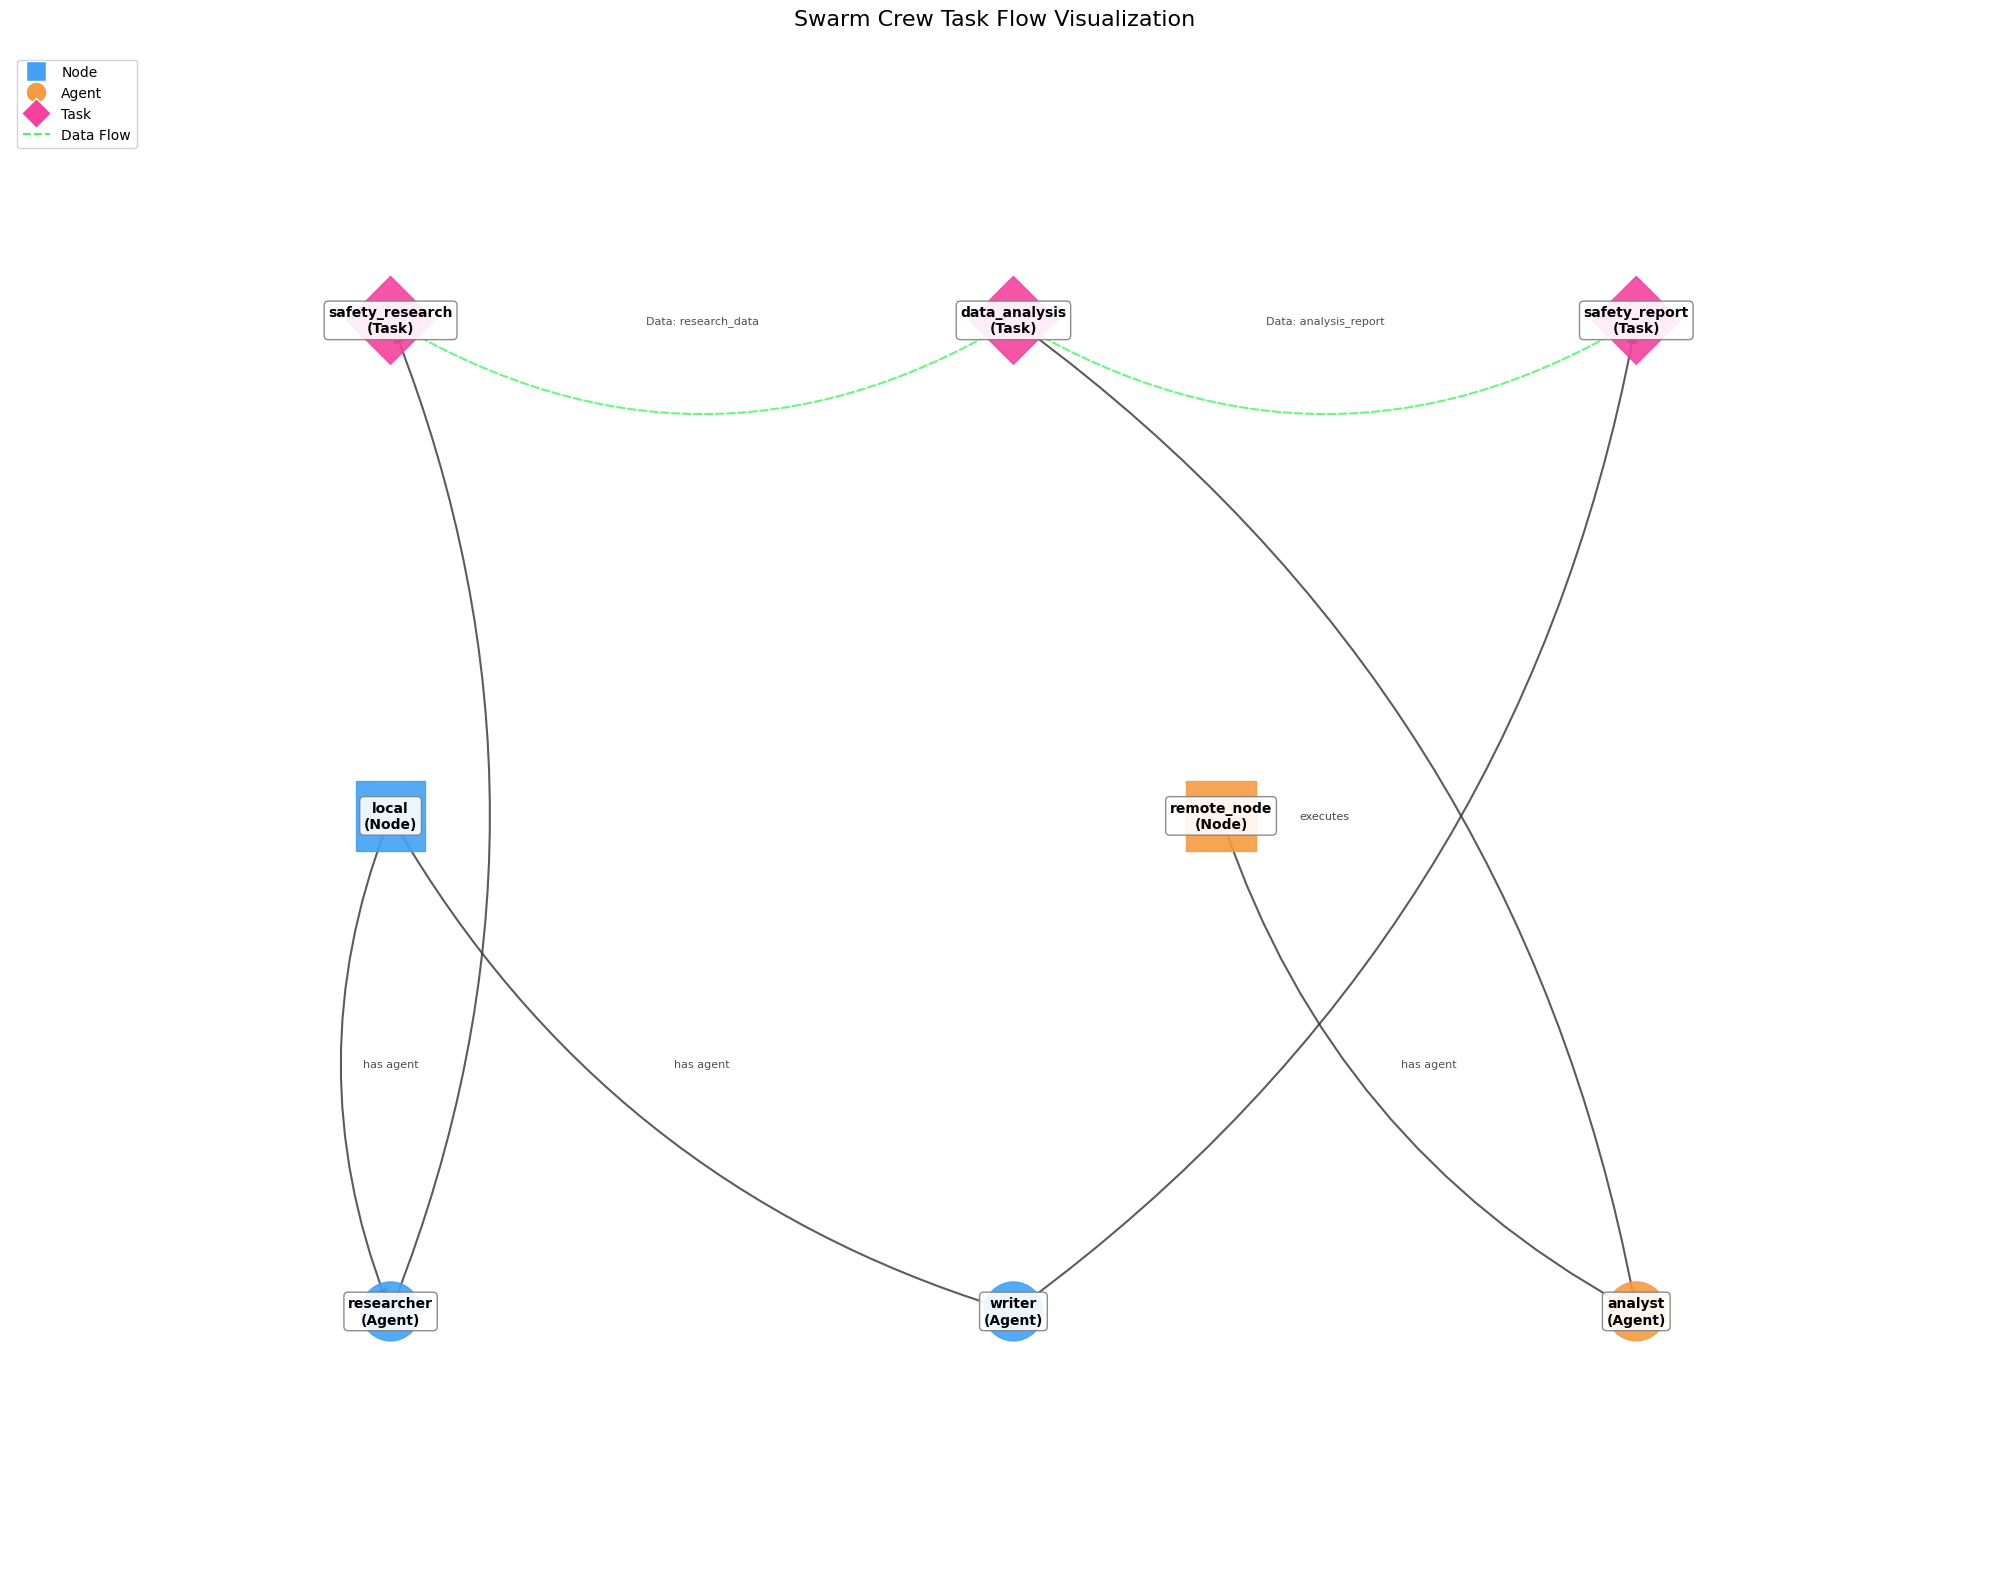

True

In [12]:
# Basic usage to display the graph
crew.visualize_swarm_flow()

# Save to a file without displaying
# crew.visualize_swarm_flow(save_path="swarm_flow.png", show=False)

# Save and display
# crew.visualize_swarm_flow(save_path="swarm_flow.png")